In [50]:
from immsim import immsim
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

# Scénario référence

In [51]:
ref = immsim()
ref.set_npr_policy(entry_cap = 252e3, renewal_rate = 0.8)
ref.set_imm_policy(entry_cap = 50e3, accept_rate = 0.1)
ref.proj(2025)

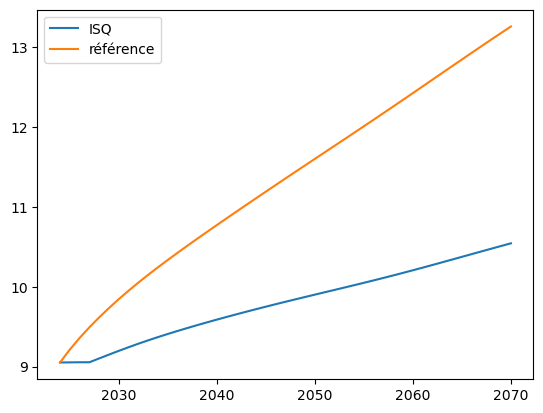

In [52]:
plt.figure()
plt.plot(ref.pop.loc[2024:,:].sum(axis=1)*1e-6,label='ISQ')
plt.plot(ref.pop_sim.loc[2024:,:].sum(axis=1)*1e-6,label='référence')
plt.legend()
plt.savefig('../Figures/scn_ref_pop.png',dpi=1200)
plt.show()

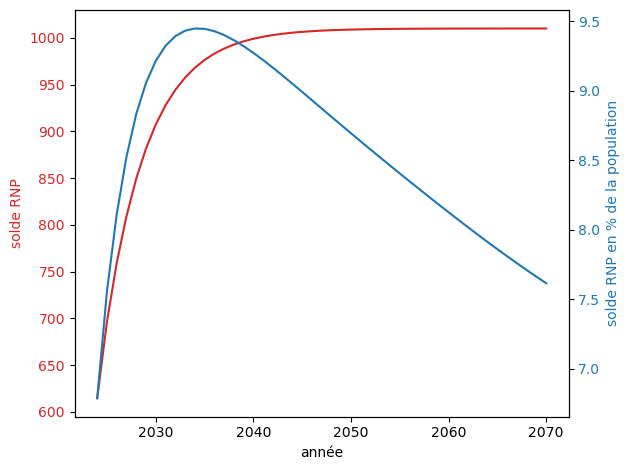

In [53]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('solde RNP', color=color)
ax1.plot(ref.npr_sim.loc[2024:,:].sum(axis=1)*1e-3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('solde RNP en % de la population', color=color)  # we already handled the x-label with ax1
ax2.plot(ref.npr_sim.loc[2024:,:].sum(axis=1)/ref.pop_sim.loc[2024:,:].sum(axis=1)*100, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('../Figures/scn_ref_solde.png',dpi=1200)
plt.show()

In [122]:
ref.npr_sim.loc[2024,:].sum()/ 

0.06789658430721517

In [124]:
ref.pop_sim.loc[2024,:].sum()*0.05

452583.15

# Scénario fédéral sur les sorties

In [54]:
fed = immsim()
fed.set_npr_policy(entry_cap = 252e3, renewal_rate = 0.58)
fed.set_imm_policy(entry_cap = 50e3, accept_rate = 0.08)
fed.proj(2025)

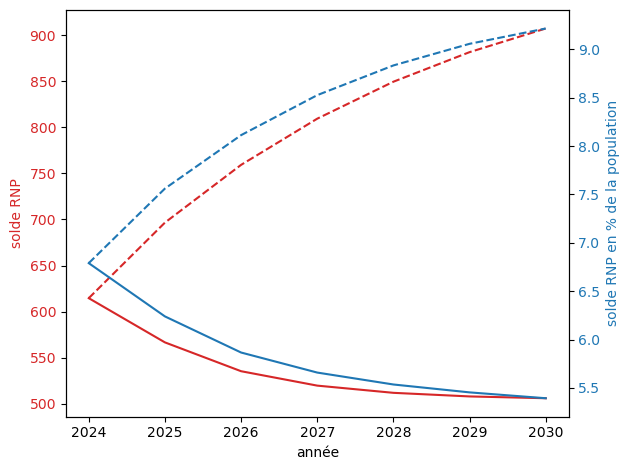

In [55]:
year_end = 2030
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('solde RNP', color=color)
ax1.plot(ref.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3, color=color, linestyle='--',label='référence')
ax1.plot(fed.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3, color=color, label='sortie fédéral')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('solde RNP en % de la population', color=color)  # we already handled the x-label with ax1
ax2.plot(ref.npr_sim.loc[2024:year_end,:].sum(axis=1)/ref.pop_sim.loc[2024:,:].sum(axis=1)*100, 
         color=color,linestyle='--',label='référence')
ax2.plot(fed.npr_sim.loc[2024:year_end,:].sum(axis=1)/fed.pop_sim.loc[2024:,:].sum(axis=1)*100, 
         color=color,label='sortie fédéral')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('../Figures/scn_fed_solde.png',dpi=1200)
plt.show()

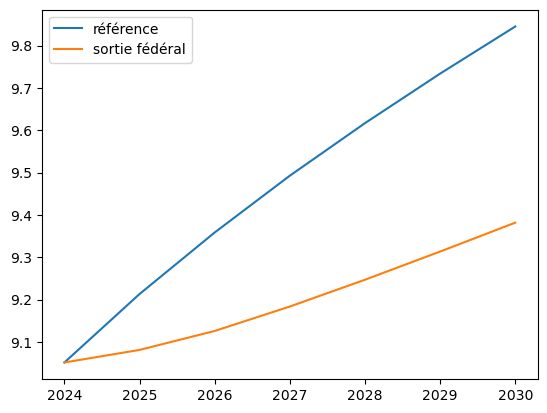

In [56]:
plt.figure()
plt.plot(ref.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6,label='référence')
plt.plot(fed.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6,label='sortie fédéral')
plt.legend()
plt.savefig('../Figures/scn_fed_pop.png',dpi=1200)
plt.show()

Experiment with exit rate

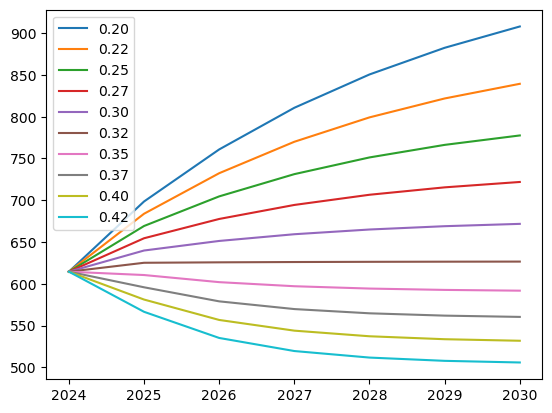

In [61]:
accept_rates = np.linspace(0.2,0.42,10)
plt.figure()
for a in accept_rates:
    ex = immsim()
    ex.set_npr_policy(entry_cap = 252e3, renewal_rate = 1 - a)
    ex.set_imm_policy(entry_cap = 50e3, accept_rate = 0.08)
    ex.proj(2025)
    cap_for_label = int(pr_cap*1e-3)
    plt.plot(ex.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3,label=f'{a:.2f}')
plt.legend()
plt.show()

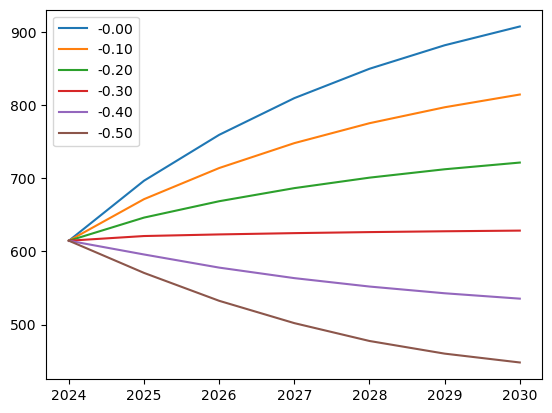

In [64]:
entry_cuts = np.linspace(0.0,0.5,6)
plt.figure()
for a in entry_cuts:
    ex = immsim()
    ex.set_npr_policy(entry_cap = 252e3*(1-a), renewal_rate = 0.8)
    ex.set_imm_policy(entry_cap = 50e3, accept_rate = 0.1)
    ex.proj(2025)
    plt.plot(ex.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3,label=f'{-a:.2f}')
plt.legend()
plt.show()

In [65]:
entry_cuts = np.linspace(0,0.5,10)
accept_rates = np.linspace(0.2,0.5,10)
results = pd.DataFrame(index=entry_cuts,columns=accept_rates,dtype='float64')
for e in entry_cuts:
    for a in accept_rates:
        ex = immsim()
        ex.set_npr_policy(entry_cap = 252e3*(1-e), renewal_rate =  1 - a)
        ex.set_imm_policy(entry_cap = 50e3, accept_rate = 0.08)
        ex.proj(2025)
        results.loc[e,a] = ex.npr_sim.loc[year_end,:].sum()*1e-3

In [43]:
results

,0.050000,0.072222,0.094444,0.116667,0.138889,0.161111,0.183333,0.205556,0.227778,0.250000
0.000000,712.640967,673.721929,644.142947,605.643680,575.793868,548.478516,523.411488,500.375938,479.174593,459.628399
0.055556,675.657723,638.412285,604.437419,573.319230,544.890692,518.860633,494.996961,473.088266,452.942418,434.385222
0.111111,638.674478,603.102642,570.657629,541.043084,513.987516,489.242750,466.582434,445.800594,426.710243,409.142046
0.166667,601.691234,567.792999,536.914784,508.766938,483.084340,459.624868,438.167907,418.512922,400.478068,383.898869
0.222222,564.707989,532.483356,503.171940,476.490791,452.181164,430.006985,409.753380,391.225250,374.245893,358.655692
0.277778,527.724745,497.173713,469.429095,444.214645,421.277988,400.389102,381.338853,363.937578,348.013718,333.412515
0.333333,490.741501,461.864070,435.686251,411.938499,390.374812,370.771219,352.924326,336.649906,321.781544,308.169338
0.388889,453.758256,426.554426,401.943406,379.662353,359.471636,341.153337,324.509800,309.362234,295.549369,282.926161
0.444444,416.775012,391.244783,368.200562,347.386207,328.568460,311.535454,296.095273,282.074562,269.317194,257.682984
0.500000,379.791768,355.935140,334.457717,315.110061,297.665284,281.917571,267.680746,254.786890,243.085019,232.439807


/var/folders/_s/frrs5cv93s1g304nnl9bvllw0000gp/T/ipykernel_33519/2298520757.py:7: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  p = CS.collections[0].get_paths()[0]


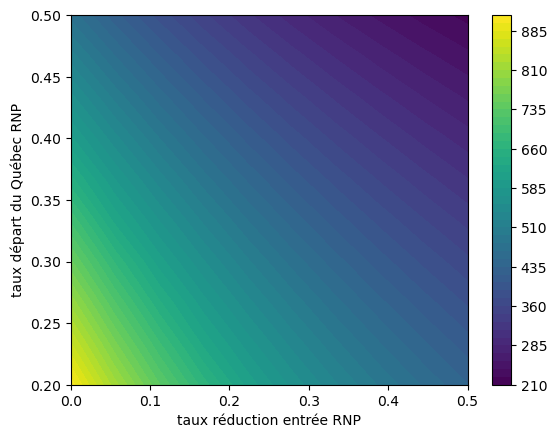

In [ ]:
fig, ax = plt.subplots()
CS = ax.contourf(results.index,results.columns,results.values,levels=50)
ax.set_ylabel('taux départ du Québec RNP')
ax.set_xlabel('taux réduction entrée RNP')
fig.colorbar(CS)




In [115]:
scn = immsim()
scn.set_npr_policy(entry_cap = 252e3*(1-0.2), renewal_rate = 0.6)
scn.set_imm_policy(entry_cap = 70e3, accept_rate = 0.08)
scn.proj(2025)

In [125]:
years = np.arange(2024,2031)
scenarios = ['référence','alternatif']  
stats = ['population','solde des RNP','taux d\'activité']
results = pd.DataFrame(index=years,columns=pd.MultiIndex.from_product([scenarios,stats]),dtype='float64')

In [126]:
results

référence                               alternatif                \
     population solde des RNP taux d'activité population solde des RNP   
2024        NaN           NaN             NaN        NaN           NaN   
2025        NaN           NaN             NaN        NaN           NaN   
2026        NaN           NaN             NaN        NaN           NaN   
2027        NaN           NaN             NaN        NaN           NaN   
2028        NaN           NaN             NaN        NaN           NaN   
2029        NaN           NaN             NaN        NaN           NaN   
2030        NaN           NaN             NaN        NaN           NaN   

                      
     taux d'activité  
2024             NaN  
2025             NaN  
2026             NaN  
2027             NaN  
2028             NaN  
2029             NaN  
2030             NaN

In [127]:
results.loc[:,('référence','population')] = ref.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6
results.loc[:,('alternatif','population')] = scn.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6


/var/folders/_s/frrs5cv93s1g304nnl9bvllw0000gp/T/ipykernel_33519/2949909731.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9.051663 9.213337445802779 9.358705040205713 9.492846170220547
 9.616949104608715 9.733922147899028 9.84522409415427]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.loc[:,('référence','population')] = ref.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6
/var/folders/_s/frrs5cv93s1g304nnl9bvllw0000gp/T/ipykernel_33519/2949909731.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9.051663 9.062936845802776 9.103648164086666 9.164826948841567
 9.235734090938662 9.312339747799317 9.392005281714313]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.loc[:,('alternatif','population')] = scn.pop_sim.loc[2024:year_end,:].sum(a

In [128]:
results

référence                               alternatif                \
     population solde des RNP taux d'activité population solde des RNP   
2024   9.051663           NaN             NaN   9.051663           NaN   
2025   9.213337           NaN             NaN   9.062937           NaN   
2026   9.358705           NaN             NaN   9.103648           NaN   
2027   9.492846           NaN             NaN   9.164827           NaN   
2028   9.616949           NaN             NaN   9.235734           NaN   
2029   9.733922           NaN             NaN    9.31234           NaN   
2030   9.845224           NaN             NaN   9.392005           NaN   

                      
     taux d'activité  
2024             NaN  
2025             NaN  
2026             NaN  
2027             NaN  
2028             NaN  
2029             NaN  
2030             NaN

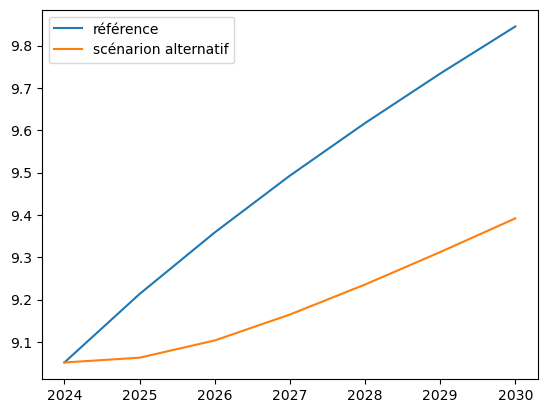

In [116]:
plt.figure()
plt.plot(ref.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6,label='référence')
plt.plot(scn.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6,label='scénarion alternatif')
plt.legend()
plt.savefig('../Figures/scn_opt_pop.png',dpi=1200)
plt.show()

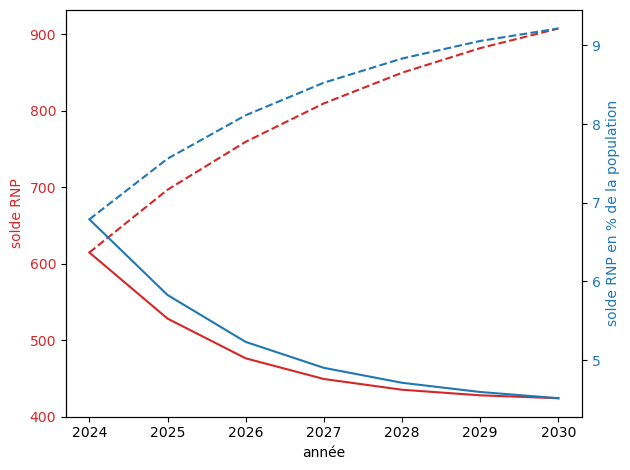

In [117]:
year_end = 2030
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('solde RNP', color=color)
ax1.plot(ref.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3, color=color, linestyle='--',label='référence')
ax1.plot(scn.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3, color=color, label='alternatif')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('solde RNP en % de la population', color=color)  # we already handled the x-label with ax1
ax2.plot(ref.npr_sim.loc[2024:year_end,:].sum(axis=1)/ref.pop_sim.loc[2024:,:].sum(axis=1)*100, 
         color=color,linestyle='--',label='référence')
ax2.plot(scn.npr_sim.loc[2024:year_end,:].sum(axis=1)/scn.pop_sim.loc[2024:,:].sum(axis=1)*100, 
         color=color,label='alternatif')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('../Figures/scn_opt_solde.png',dpi=1200)
plt.show()

In [129]:
results.loc[:,('référence','solde des RNP')] = ref.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3
results.loc[:,('alternatif','solde des RNP')] = scn.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3

/var/folders/_s/frrs5cv93s1g304nnl9bvllw0000gp/T/ipykernel_33519/85507082.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[614.5770000000001 696.5764000000001 759.2611200000002 809.408896
 849.5271167999999 881.6216934400001 907.2973547520002]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.loc[:,('référence','solde des RNP')] = ref.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3
/var/folders/_s/frrs5cv93s1g304nnl9bvllw0000gp/T/ipykernel_33519/85507082.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[614.5770000000001 528.17556 476.25129119999986 449.2506714239999
 435.21034914048 427.90938155304946 424.1128784075857]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.loc[:,('alternatif','solde des RNP')] = scn.npr_sim.loc[2024:year_end,:]

In [130]:
results

référence                               alternatif                \
     population solde des RNP taux d'activité population solde des RNP   
2024   9.051663       614.577             NaN   9.051663       614.577   
2025   9.213337      696.5764             NaN   9.062937     528.17556   
2026   9.358705     759.26112             NaN   9.103648    476.251291   
2027   9.492846    809.408896             NaN   9.164827    449.250671   
2028   9.616949    849.527117             NaN   9.235734    435.210349   
2029   9.733922    881.621693             NaN    9.31234    427.909382   
2030   9.845224    907.297355             NaN   9.392005    424.112878   

                      
     taux d'activité  
2024             NaN  
2025             NaN  
2026             NaN  
2027             NaN  
2028             NaN  
2029             NaN  
2030             NaN

In [119]:
work_rates_sim_ref = []
work_rates_sim_scn = []
for tt in range(2024,2031):
    work = ref.pop_sim.loc[tt,15:65].sum() 
    work_rates_sim_ref.append(work/ref.pop.loc[tt,:].sum())
    work = scn.pop_sim.loc[tt,15:65].sum() 
    work_rates_sim_scn.append(work/scn.pop.loc[tt,:].sum())



In [131]:
results.loc[:,('référence','taux d\'activité')] = work_rates_sim_ref
results.loc[:,('alternatif','taux d\'activité')] = work_rates_sim_scn

In [133]:
results

référence                               alternatif                \
     population solde des RNP taux d'activité population solde des RNP   
2024   9.051663       614.577        0.649113   9.051663       614.577   
2025   9.213337      696.5764        0.661685   9.062937     528.17556   
2026   9.358705     759.26112        0.672210   9.103648    476.251291   
2027   9.492846    809.408896        0.681673   9.164827    449.250671   
2028   9.616949    849.527117        0.686978   9.235734    435.210349   
2029   9.733922    881.621693        0.691313    9.31234    427.909382   
2030   9.845224    907.297355        0.695342   9.392005    424.112878   

                      
     taux d'activité  
2024        0.649113  
2025        0.646519  
2026        0.646462  
2027        0.648544  
2028        0.648701  
2029        0.649277  
2030        0.650507

In [135]:
results.round(2).to_excel('../Figures/scn_opt.xlsx')

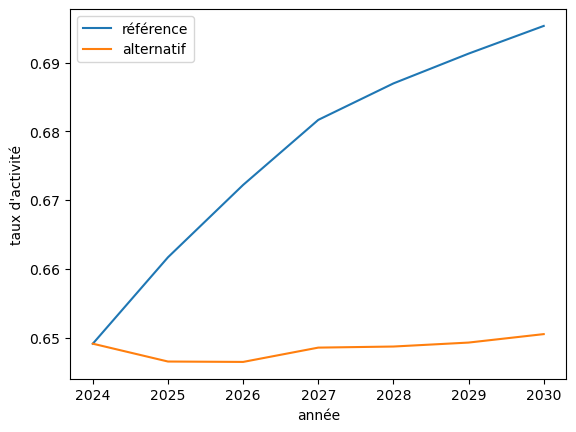

In [121]:
years = np.arange(2024,2031)
plt.figure()
plt.plot(years,work_rates_sim_ref,label='référence')
plt.plot(years,work_rates_sim_scn,label='alternatif')
plt.legend()
plt.xlabel('année')
plt.ylabel('taux d\'activité')
plt.show()